In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Literal

In [2]:
class NACAProfile:
    NUMBER_POINTS = 15

    def __init__(self, name: str,distribution:Literal['Standard','Logarithmic']='Standard'):
        if len(name) == 4 and name.isdigit():
            self.name = 'NACA ' + name
            self.t = int(name[2:]) / 100
            self.m = int(name[0]) / 100
            self.p = int(name[1]) / 10
            self.distribution=distribution

    def yt(self, x):
        return 5 * self.t * (0.2969 * np.sqrt(x) - 0.1260 * x - 0.3516 * x**2 + 0.2843 * x**3 - 0.1015 * x**4)

    def yc(self, x):
        x = np.asarray(x)
        yc = np.where(
            x < self.p,
            self.m / self.p**2 * (2 * self.p * x - x**2),
            self.m / (1 - self.p)**2 * ((1 - 2 * self.p) + 2 * self.p * x - x**2)
        )
        return yc

    def theta(self, x):
        x = np.asarray(x)
        dyc_dx = np.where(
            x < self.p,
            2 * self.m / self.p**2 * (self.p - x),
            2 * self.m / (1 - self.p)**2 * (self.p - x)
        )
        return np.arctan(dyc_dx)

    def contour(self):
        if self.distribution == 'Standard':
            x = np.linspace(0, 1, self.NUMBER_POINTS)
        else:
            x = np.logspace(-2, 0, self.NUMBER_POINTS)
            x[0] = 0.0  # Ensure the first point is exactly 0
        
        yt = self.yt(x)
        yc = self.yc(x)
        theta = self.theta(x)

        xu = x - yt * np.sin(theta)
        yu = yc + yt * np.cos(theta)
        xl = x + yt * np.sin(theta)
        yl = yc - yt * np.cos(theta)

        # Concatenate upper and lower surfaces for plotting
        x_coords = np.concatenate([xu[:-1], xl[::-1]])
        y_coords = np.concatenate([yu[:-1], yl[::-1]])
        return x_coords, y_coords

In [ ]:
class ALA:
    def __init__(self,
    envergdura:int=20,
    profile_map:dict[float,float]={0:2442,1:2442},
    chord_map:dict[float,float]={0:6,1:0.5},
    angle_map:dict[float,float]={0:2},
    flinge_map:dict[float,float]={0:0,1:0.6},):
        self.envergdura=envergdura
        self.profile_map=profile_map
        self.chord_map=chord_map
        self.angle_map=angle_map
        self.flinge_map=flinge_map


(np.float64(-0.049995809302337005),
 np.float64(1.049911995349077),
 np.float64(-0.04844818569209759),
 np.float64(0.08517125519006227))

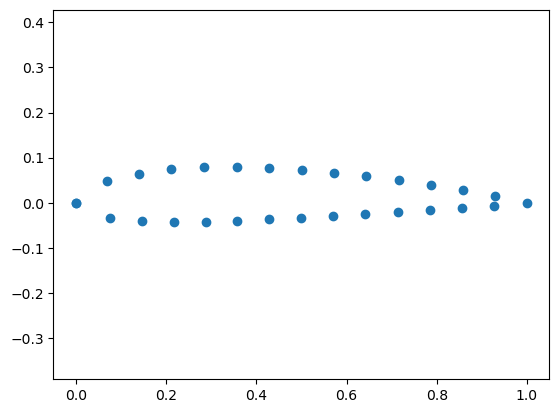

In [5]:
ALA=NACAProfile('2412')
x,y=ALA.contour()
plt.scatter(x,y)
plt.axis('equal')